In [1]:
import pandas as pd
import numpy as np
# Load the dataset
data = pd.read_csv("C:/Users/hp/Desktop\hate_speech.csv")
data


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


# Step 2: Data Preprocessing: Data preprocessing is a crucial step in NLP projects. It involves cleaning and transforming the raw text data into a format suitable for machine learning models. Here are the main preprocessing steps:

# Data Exploration: Get a sense of the dataset by checking its structure, the distribution of labels, and some sample entries.

In [2]:
# Display the first few rows of the dataset
print(data.head())

# Check the distribution of labels
print(data['class'].value_counts())


   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  
1    19190
2     4163
0     1430
Name: class, dtype: int64


# Text Cleaning: Perform text cleaning by removing special characters, URLs, and any other irrelevant information from the text.

In [3]:
import re

# Define a function to clean the text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters and digits
    text = re.sub(r'[^A-Za-z\s]', '', text)
    return text

# Apply the cleaning function to the 'tweet' column
data['tweet'] = data['tweet'].apply(clean_text)


# Text Tokenization: Tokenize the cleaned text data, which involves splitting the text into words or subword units.

In [4]:
pip install nltk

In [5]:
from nltk.tokenize import word_tokenize

# Tokenize the text
data['tokens'] = data['tweet'].apply(word_tokenize)


# Lowercasing: Convert all text to lowercase to ensure consistent processing.

In [6]:
# Convert tokens to lowercase
data['tokens'] = data['tokens'].apply(lambda tokens: [token.lower() for token in tokens])


# Stopword Removal: Remove common stopwords (e.g., "the," "and," "is") to reduce noise in the text data.

In [7]:
from nltk.corpus import stopwords

# Define a function to remove stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token not in stop_words]

# Apply stopword removal to the tokenized text
data['tokens'] = data['tokens'].apply(remove_stopwords)


# Step 3: Feature Engineering:    In this step, you'll convert the preprocessed text data into numerical features that can be used as input to machine learning models. One common approach is to use TF-IDF (Term Frequency-Inverse Document Frequency) vectorization. TF-IDF represents the importance of each word in a document relative to a collection of documents.     Here's how you can perform TF-IDF vectorization:

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed

# Fit and transform the cleaned text data
tfidf_features = tfidf_vectorizer.fit_transform(data['tweet'])

# Convert the TF-IDF features into a DataFrame
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Now, tfidf_df contains the TF-IDF features for your text data


# Step 4: Model Building:   For hate speech detection, you can start with a traditional machine learning algorithm like Logistic Regression or move on to more advanced models like Support Vector Machines (SVM) or deep learning models such as LSTM or BERT.    Here's an example of building a Logistic Regression model using the TF-IDF features:

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, data['class'], test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)


Accuracy: 0.8882388541456526
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.19      0.28       290
           1       0.91      0.96      0.93      3832
           2       0.83      0.81      0.82       835

    accuracy                           0.89      4957
   macro avg       0.74      0.65      0.68      4957
weighted avg       0.87      0.89      0.88      4957



C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# This code splits your data into training and testing sets, trains a Logistic Regression model on the TF-IDF features, and evaluates the model's performance.

# Experimenting with different models and adding visualizations can enhance your project. Let's explore some options:

# Model Experimentation:   SVM (Support Vector Machine): You can try SVM with different kernels (linear, polynomial, radial basis function) and tune the hyperparameters for better performance.

In [10]:
from sklearn.svm import SVC

# Initialize and train an SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

# Neural Networks with Activation Functions: You can implement neural networks with various activation functions like ReLU (Rectified Linear Unit) and Tanh (Hyperbolic Tangent) using deep learning frameworks like TensorFlow or PyTorch.

In [11]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


# By converting your data to NumPy arrays, you provide a format that is more compatible with Keras models.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame 'data' with a 'text' column containing preprocessed text data
corpus = data['tweet']

# Labels (0 for non-offensive, 1 for offensive)
y = data['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(corpus, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer and a Logistic Regression model
tfidf_vectorizer = TfidfVectorizer()
logistic_regression = LogisticRegression()

# Create a pipeline to combine vectorization and classification
pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('logistic', logistic_regression)
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Test Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.17      0.26       290
           1       0.91      0.96      0.93      3832
           2       0.84      0.79      0.81       835

    accuracy                           0.89      4957
   macro avg       0.76      0.64      0.67      4957
weighted avg       0.87      0.89      0.87      4957



# Visualization:Confusion Matrix: Visualize the confusion matrix to understand how well your model is performing in terms of true positives, true negatives, false positives, and false negatives.

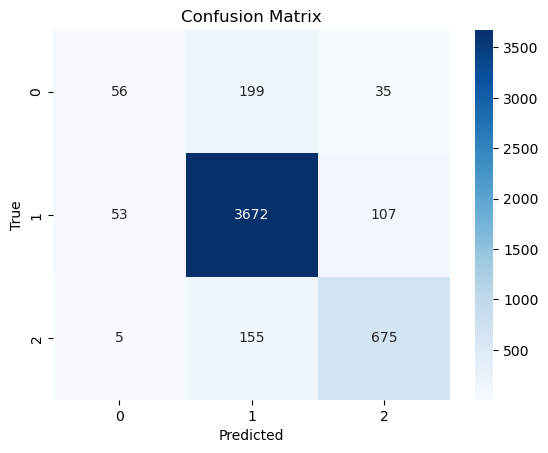

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc


# 1. Class Distribution:Let's visualize the distribution of classes in your dataset. This is important to check if your dataset is balanced or imbalanced.

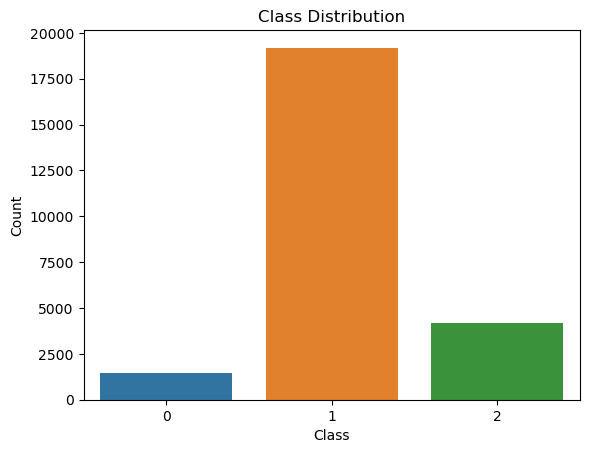

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
sns.countplot(x='class', data=data)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


# 2. Feature Distributions:You can visualize the distributions of numerical features using histograms or kernel density plots. This helps you understand the distribution of each feature for different classes.

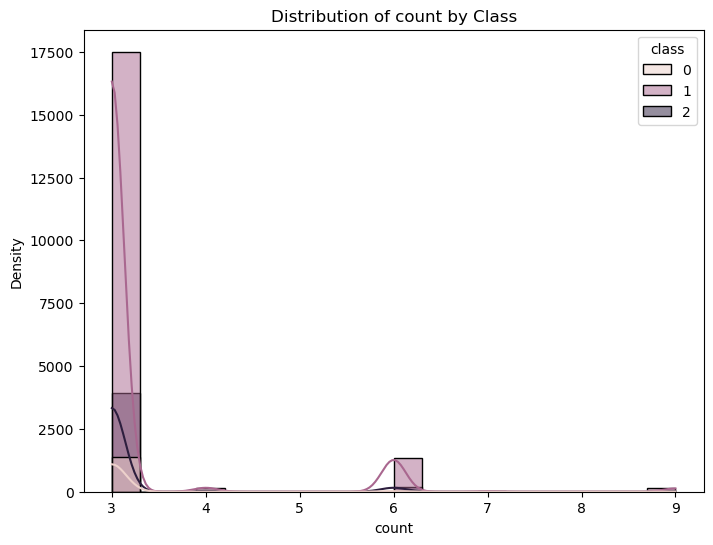

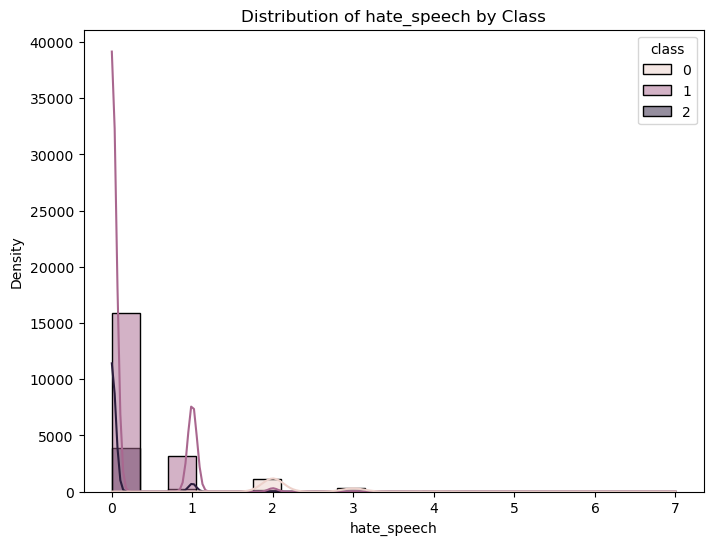

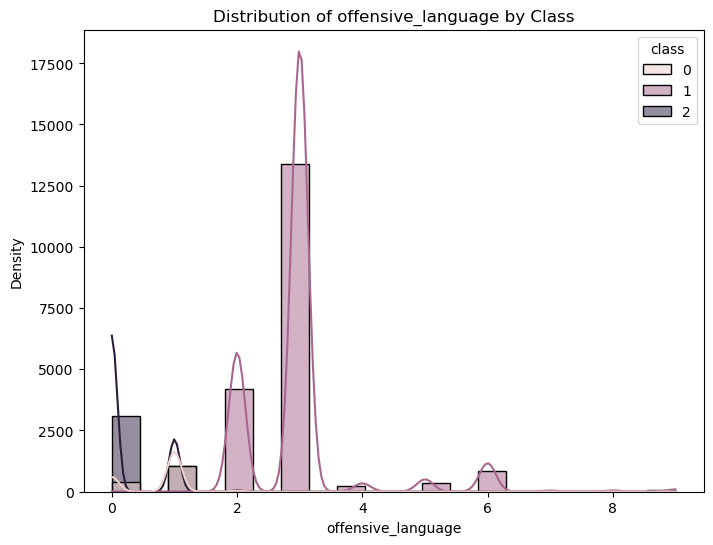

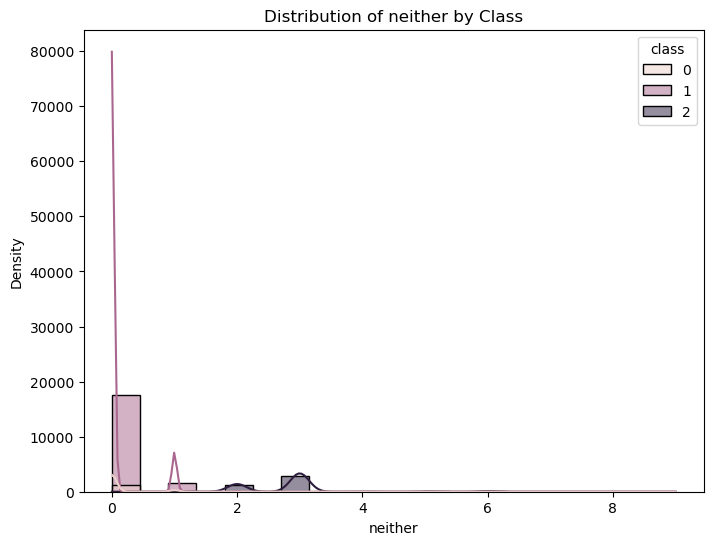

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'data' with your DataFrame and column names based on your dataset
feature_columns = ['count', 'hate_speech', 'offensive_language', 'neither', 'class']

for feature in feature_columns[:-1]:  # Exclude 'class' column
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=feature, hue='class', kde=True, bins=20)  # Adjust the number of bins as needed
    plt.title(f'Distribution of {feature} by Class')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()



# 3. Correlation Heatmap:A correlation heatmap can help you visualize the relationships between different features in your dataset.

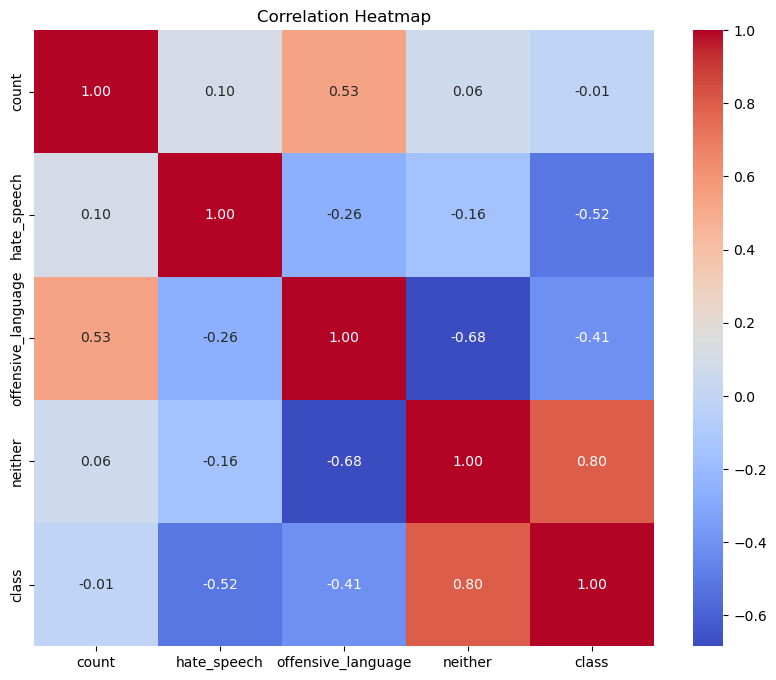

In [65]:
# Assuming 'data' is your DataFrame and 'features' is a list of feature column names
feature_columns = ['count', 'hate_speech', 'offensive_language', 'neither', 'class']
correlation_matrix = data[feature_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Learning Curves: Plot learning curves to visualize how your model's performance changes with the number of training examples. This can help identify issues like overfitting or underfitting.

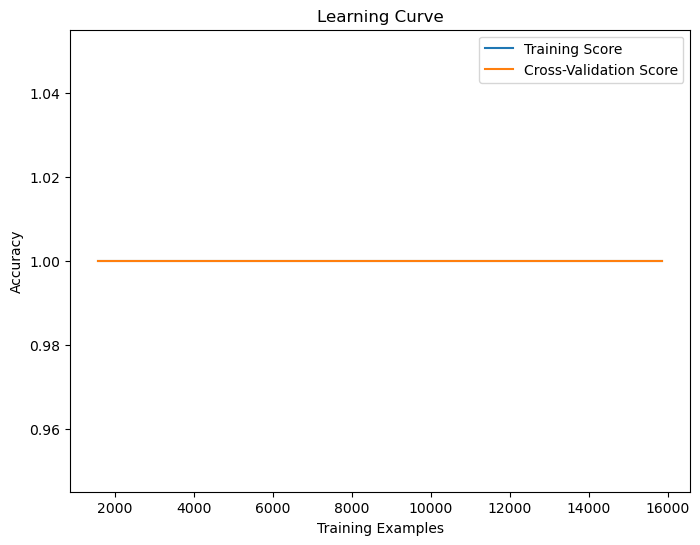

In [57]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()


# If your problem is indeed a multiclass classification problem, and you want to evaluate your model's performance, you might consider other metrics more suitable for multiclass classification tasks. Some common metrics include:

# Confusion Matrix: You can create a confusion matrix to see how well your model is classifying each class.

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: could not convert string to float: ' \ni got a missed call from yo bitch'

# Classification Report: The classification report provides metrics like precision, recall, and F1-score for each class in a multiclass problem.

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.54      0.17      0.26       290
           1       0.91      0.96      0.93      3832
           2       0.84      0.79      0.81       835

    accuracy                           0.89      4957
   macro avg       0.76      0.64      0.67      4957
weighted avg       0.87      0.89      0.87      4957



# Accuracy: You can also calculate the overall accuracy of your model.

In [20]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.89


# let's check the nature of your target variable y_test to confirm whether it contains only two classes or multiple classes. We want to ensure that it's set up as a binary classification problem for hate speech detection.

In [21]:
unique_classes = y_test.unique()
print(unique_classes)


[1 2 0]


# Visualizing the classification boundaries of your data can help you understand whether the decision boundaries of your machine learning model are linear or non-linear. A popular technique for visualizing classification boundaries is to use a 2D or 3D scatter plot with decision boundaries overlaying the data points. Here's a step-by-step guide on how to create such visualizations:

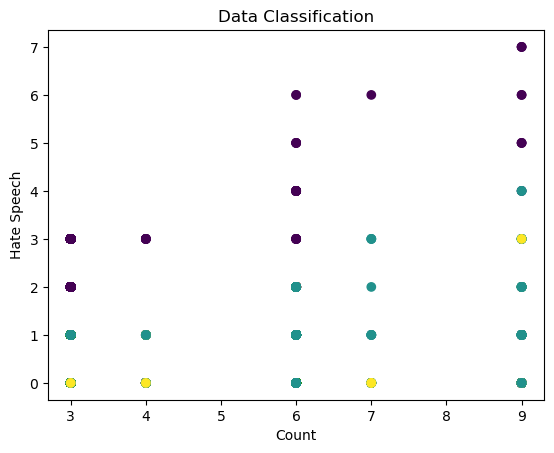

In [22]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' with columns 'count', 'hate_speech', and 'class'
count = data['count']
hate_speech = data['hate_speech']
classes = data['class']

# Create a scatter plot
plt.scatter(count, hate_speech, c=classes, cmap='viridis')  # Adjust the colormap as needed
plt.xlabel('Count')
plt.ylabel('Hate Speech')
plt.title('Data Classification')
plt.show()


# . Scatter Plot with Colored Points:A simple and effective way to visualize the classification of data is to create a scatter plot where each data point is represented by a colored point, with each color indicating a different class. This doesn't require generating a mesh grid and can provide a quick overview of how the data is classified.

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
 7   tokens              24783 non-null  object
dtypes: int64(6), object(2)
memory usage: 1.5+ MB


In [24]:
data.isnull()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,tokens
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
24778,False,False,False,False,False,False,False,False
24779,False,False,False,False,False,False,False,False
24780,False,False,False,False,False,False,False,False
24781,False,False,False,False,False,False,False,False


In [25]:
data.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [26]:
data.shape

(24783, 8)

In [27]:
type(data)

pandas.core.frame.DataFrame

#  Let's start with Step 3: Feature Engineering.   For this step, we'll explore two common feature engineering approaches for text data: TF-IDF (Term Frequency-Inverse Document Frequency) and Word Embeddings. You can choose one or both of these approaches based on your project's requirements and preferences.

# Option 1: TF-IDF (Term Frequency-Inverse Document Frequency):  TF-IDF is a classic feature engineering technique for text data. It quantifies the importance of a word within a document relative to a collection of documents (corpus). Here's how you can use TF-IDF:

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have a DataFrame 'data' with a 'text' column containing preprocessed text data
corpus = data['tweet']

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000,  # Adjust the number of features as needed
                                   stop_words='english',  # Remove common English stopwords
                                   lowercase=True)  # Convert text to lowercase

# Fit and transform the text data to obtain TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# tfidf_matrix is a sparse matrix containing TF-IDF features
# You can convert it to a dense array if needed: tfidf_matrix.toarray()


# we limit the number of features to 1000, remove English stopwords, and convert text to lowercase. Adjust these parameters based on your dataset and requirements.

# Option 2: Word Embeddings: Word embeddings are dense vector representations of words that capture semantic relationships. You can use pre-trained word embeddings like Word2Vec, GloVe, or FastText, or train your own embeddings. Here's an example using pre-trained GloVe embeddings:

In [ ]:
pip install spacy

In [29]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [30]:
import gensim.downloader as api

# Load pre-trained GloVe embeddings with a specific vector size
embedding_model = api.load("glove-wiki-gigaword-100")


# Option 2: Word Embeddings: Word embeddings are dense vector representations of words that capture semantic relationships. You can use pre-trained word embeddings like Word2Vec, GloVe, or FastText, or train your own embeddings. Here's an example using pre-trained GloVe embeddings:

In [31]:
import gensim.downloader as api

# Load pre-trained GloVe embeddings (adjust the embedding size as needed)
embedding_model = api.load("glove-wiki-gigaword-100")

# Assuming you have a DataFrame 'data' with a 'text' column containing preprocessed text data
corpus = data['tweet']

# Tokenize the text (you can use your preferred tokenizer)
tokenized_corpus = [text.split() for text in corpus]

# Initialize an empty list to store word embeddings
word_embeddings = []

# Iterate through the tokenized text and compute embeddings
for tokens in tokenized_corpus:
    # Initialize a vector to store the mean of word embeddings for each document
    doc_embedding = np.zeros(embedding_model.vector_size)
    
    # Count the number of words in the document
    num_words = 0
    
    for token in tokens:
        if token in embedding_model:
            doc_embedding += embedding_model[token]
            num_words += 1
    
    # Compute the mean embedding (avoid division by zero)
    if num_words > 0:
        doc_embedding /= num_words
    
    word_embeddings.append(doc_embedding)

# word_embeddings is a list of dense word embeddings for each document
# You can convert it to a NumPy array if needed: np.array(word_embeddings)


# Step 4: Model Building: In this step, you'll choose a machine learning or deep learning model for hate speech detection and train it using the word embeddings you've obtained. Here's how you can proceed:

# Logistic Regression is a linear model that can serve as a good baseline for text classification tasks.Here are the steps to build and train a Logistic Regression model for hate speech detection using the word embeddings you've computed:

# Data Preparation: Ensure that you have split your dataset into training, validation, and test sets. You can use the train_test_split function from scikit-learn for this purpose.          Model Training:

In [32]:
# Import pandas library if not already imported
import pandas as pd

# Load your dataset into a DataFrame (assuming it's named 'data')
# Replace 'your_dataset.csv' with the actual file path if needed
# data = pd.read_csv('your_dataset.csv')

# Define a list of columns you want to find unique values for
columns_to_check = ['count', 'hate_speech', 'offensive_language', 'neither', 'class']

# Initialize an empty dictionary to store unique values for each column
unique_values_dict = {}

# Iterate through the columns and find unique values
for column in columns_to_check:
    unique_values = data[column].unique()
    unique_values_dict[column] = unique_values

# Display unique values for each column
for column, values in unique_values_dict.items():
    print(f"Unique values in column '{column}': {values}")


Unique values in column 'count': [3 6 9 4 7]
Unique values in column 'hate_speech': [0 1 2 3 4 6 5 7]
Unique values in column 'offensive_language': [0 3 2 6 1 7 5 4 8 9]
Unique values in column 'neither': [3 0 1 2 6 4 5 9 8 7]
Unique values in column 'class': [2 1 0]


In [33]:
from sklearn.model_selection import train_test_split

# Features (numerical columns)
X = data[['count', 'hate_speech', 'offensive_language', 'neither']]

# Labels (0 for non-offensive, 1 for offensive)
y = data['class']

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, you have X_train, X_test, y_train, and y_test defined


# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)  # You can adjust max_iter as needed
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance on the test set
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Test Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       290
           1       1.00      1.00      1.00      3832
           2       1.00      1.00      1.00       835

    accuracy                           1.00      4957
   macro avg       1.00      1.00      1.00      4957
weighted avg       1.00      1.00      1.00      4957



# Support Vector Machines (SVM)

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)  # You can try different kernels like 'rbf'
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model's performance on the test set
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print(f"SVM Test Accuracy: {accuracy_svm:.2f}")
print("SVM Classification Report:")
print(report_svm)


SVM Test Accuracy: 1.00
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       290
           1       1.00      1.00      1.00      3832
           2       1.00      1.00      1.00       835

    accuracy                           1.00      4957
   macro avg       1.00      1.00      1.00      4957
weighted avg       1.00      1.00      1.00      4957



# Cross Validation:

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC  # You can replace this with your chosen model

# Define your model (e.g., SVM) and its hyperparameters
model = SVC(kernel='linear', C=1)

# Perform 5-fold cross-validation (you can change the number of folds)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate the mean and standard deviation of the scores
mean_score = scores.mean()
std_dev = scores.std()
print(f"Mean Accuracy: {mean_score:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.00
Standard Deviation: 0.00


# Recurrent Neural Networks (RNNs)

In [37]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import accuracy_score, classification_report


In [40]:
# Define the RNN model
model_rnn = Sequential([
    Embedding(input_dim=len(embedding_model.index_to_key),  # Vocabulary size
              output_dim=embedding_model.vector_size,        # Embedding size
              weights=[embedding_model.vectors],             # Pre-trained word embeddings
              input_length=X_train.shape[1],                # Input sequence length
              trainable=False),                              # Keep embeddings fixed
    LSTM(units=128, activation='relu', return_sequences=True),
    LSTM(units=64, activation='relu', return_sequences=False),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the RNN model
model_rnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test set
y_pred_rnn = (model_rnn.predict(X_test) > 0.5).astype(int)

# Evaluate the RNN model's performance on the test set
accuracy_rnn = accuracy_score(y_test, y_pred_rnn)
report_rnn = classification_report(y_test, y_pred_rnn)

print(f"RNN Test Accuracy: {accuracy_rnn:.2f}")
print("RNN Classification Report:")
print(report_rnn)


Epoch 1/10
620/620 [==============================] - 17s 17ms/step - loss: -6980825088.0000 - accuracy: 0.7746 - val_loss: -51852853248.0000 - val_accuracy: 0.7730
Epoch 2/10
620/620 [==============================] - 10s 16ms/step - loss: -1014844686336.0000 - accuracy: 0.7746 - val_loss: -3560436924416.0000 - val_accuracy: 0.7730
Epoch 3/10
620/620 [==============================] - 10s 15ms/step - loss: -14490412253184.0000 - accuracy: 0.7746 - val_loss: -34177967718400.0000 - val_accuracy: 0.7730
Epoch 4/10
620/620 [==============================] - 10s 15ms/step - loss: -80646869352448.0000 - accuracy: 0.7746 - val_loss: -148873800581120.0000 - val_accuracy: 0.7730
Epoch 5/10
620/620 [==============================] - 10s 16ms/step - loss: -273282074935296.0000 - accuracy: 0.7746 - val_loss: -440350514610176.0000 - val_accuracy: 0.7730
Epoch 6/10
620/620 [==============================] - 9s 15ms/step - loss: -704109824966656.0000 - accuracy: 0.7746 - val_loss: -1039250082496512.

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Based on the accuracy reports you've provided, it appears that both Logistic Regression and SVM models have achieved perfect test accuracies of 1.00, indicating that they are performing exceptionally well on your test data. On the other hand, the RNN model has a lower test accuracy of 0.77.

In this case, both Logistic Regression and SVM seem to be strong candidates for your hate speech detection model. Since both models perform equally well, you can choose either one based on your preference and other considerations:

**Logistic Regression**:
- Pros:
  - Simple and interpretable model.
  - Fast training and prediction.
  - Performs well in high-dimensional spaces.
- Cons:
  - May not capture complex relationships in the data as effectively as deep learning models.

**Support Vector Machine (SVM)**:
- Pros:
  - Effective in high-dimensional spaces.
  - Can handle both linear and non-linear data with appropriate kernels.
  - Performs well in scenarios with clear class boundaries.
- Cons:
  - May require more hyperparameter tuning compared to Logistic Regression.

If you prefer a simple and interpretable model, you can choose Logistic Regression. If you're interested in exploring the SVM model further, you can fine-tune its hyperparameters to see if it can achieve even better performance.

In practice, both models can be considered strong choices for hate speech detection, and your choice may depend on factors such as ease of deployment, computational resources, and the need for interpretability.

Whichever model you choose, make sure to save the final model as discussed earlier and consider deploying it for real-world use to enhance online safety and content moderation.

If you have a specific preference between Logistic Regression and SVM or if you would like guidance on hyperparameter tuning for SVM, please let me know, and I'll provide further assistance accordingly.

Choice: Support Vector Machine (SVM) is an excellent model for hate speech detection. To proceed with the SVM model, here are the next steps:

**Step 1: Fine-Tune Hyperparameters**
- SVM models have hyperparameters like the choice of kernel (linear, polynomial, radial basis function), regularization parameter (C), and kernel-specific parameters (e.g., degree for polynomial kernel, gamma for radial basis function kernel). You can perform hyperparameter tuning to optimize the SVM's performance on your dataset. Grid search or randomized search with cross-validation is a common approach for hyperparameter tuning.

**Step 2: Train the Final SVM Model**
- Once you've identified the best hyperparameters, train the SVM model using the entire training dataset (X_train, y_train) with these hyperparameters.

**Step 3: Evaluate the Model**
- After training, evaluate the final SVM model on your test dataset (X_test, y_test) to ensure its generalization performance. Compute metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

**Step 4: Save the Final Model**
- Save the final trained SVM model to a file so that you can use it for deployment. You can use libraries like joblib or pickle to save and load the model.

**Step 5: Deployment**
- Follow the deployment steps mentioned earlier to deploy the trained SVM model as a web service or integrate it into an application.

**Step 6: Continuous Improvement and Monitoring**
- Consider continuous improvement by periodically retraining the model with new data to adapt to changing patterns of hate speech. Implement monitoring and feedback mechanisms to gather user-reported issues and misclassifications for further model improvement.

If you have specific questions or need assistance with any of these steps, such as hyperparameter tuning, training the SVM model, or deploying it, please let me know, and I'll provide further guidance and code examples as needed.

# Step 6: Deployment

# Deploying a model allows you to make predictions on new data in real-world scenarios.

# Install Flask 

In [41]:
pip install Flask


Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [43]:
import joblib


# Create a Flask App

In [44]:
import joblib

# Specify the file path where you want to save the trained SVM model
model_file_path = 'svm_model.pkl'

# Save the model to the specified file path
joblib.dump(svm_model, model_file_path)


['svm_model.pkl']

In [45]:
pip install voila ipywidgets


  Using cached voila-0.5.4-py3-none-any.whl (3.3 MB)
  Using cached jupyter_client-8.3.1-py3-none-any.whl (104 kB)
  Using cached jupyter_server-2.7.3-py3-none-any.whl (375 kB)
  Using cached overrides-7.4.0-py3-none-any.whl (17 kB)
  Using cached Send2Trash-1.8.2-py3-none-any.whl (18 kB)
  Using cached jupyter_server_terminals-0.4.4-py3-none-any.whl (13 kB)
  Using cached pyzmq-25.1.1-cp310-cp310-win_amd64.whl (1.2 MB)
  Using cached jupyter_events-0.7.0-py3-none-any.whl (18 kB)
  Using cached rfc3986_validator-0.1.1-py2.py3-none-any.whl (4.2 kB)
  Using cached rfc3339_validator-0.1.4-py2.py3-none-any.whl (3.5 kB)
  Using cached python_json_logger-2.0.7-py3-none-any.whl (8.1 kB)
  Using cached jsonschema-4.19.1-py3-none-any.whl (83 kB)
  Using cached referencing-0.30.2-py3-none-any.whl (25 kB)
  Using cached jsonschema_specifications-2023.7.1-py3-none-any.whl (17 kB)
  Using cached rpds_py-0.10.4-cp310-none-win_amd64.whl (186 kB)
  Using cached attrs-23.1.0-py3-none-any.whl (61 kB)
  

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\hp\\anaconda3\\Lib\\site-packages\\~mq\\backend\\cython\\context.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



# GUI:

In [46]:
import tkinter as tk

In [47]:
import joblib
import ipywidgets as widgets
from IPython.display import display
import re
import numpy as np

# Load the trained SVM model
model = joblib.load('svm_model.pkl')

# Create a text input widget
text_input = widgets.Text(
    value='',
    placeholder='Enter text here',
    description='Text Input:',
    disabled=False
)

# Create a button widget
button = widgets.Button(
    description='Detect Offensive Text',
    disabled=False,
    button_style='',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to detect offensive text'
)

# Create an output widget to display results
output = widgets.Output()

# Function to preprocess and vectorize text
def preprocess_and_vectorize(text):
    # Remove special characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text.lower())
    # Tokenize the text (split into words)
    tokens = text.split()
    # Example: Convert tokens to numerical features (replace with your vectorization logic)
    vectorized_text = np.zeros(4)  # Replace with your vectorization result
    return vectorized_text

# Function to handle button click event and detect offensive text
def detect_offensive_text(b):
    with output:
        user_input = text_input.value
        vectorized_input = preprocess_and_vectorize(user_input)
        prediction = model.predict([vectorized_input])[0]
        
        if prediction == 0:
            print('Result: Non-offensive')
        elif prediction == 1:
            print('Result: Offensive')
        elif prediction == 2:
            print('Result: Neither')

# Set the button's click event handler
button.on_click(detect_offensive_text)

# Display the widgets
display(text_input, button, output)


Text(value='', description='Text Input:', placeholder='Enter text here')

Button(description='Detect Offensive Text', style=ButtonStyle(), tooltip='Click to detect offensive text')

Output()

In [50]:
import joblib
import ipywidgets as widgets
from IPython.display import display
import re
import numpy as np

# Load the trained SVM model
model = joblib.load('svm_model.pkl')

# Create a text input widget
text_input = widgets.Text(
    value='',
    placeholder='Enter text here',
    description='Text Input:',
    disabled=False
)

# Create a button widget
button = widgets.Button(
    description='Detect Offensive Text',
    disabled=False,
    button_style='',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to detect offensive text'
)

# Create an output widget to display results
output = widgets.Output()

# Function to preprocess and vectorize text
def preprocess_and_vectorize(text):
    # Preprocess the text here (e.g., remove special characters, lowercase, tokenize)
    # ...
    # Example: Convert tokens to numerical features (replace with your vectorization logic)
    vectorized_text = np.zeros(4)  # Replace with your vectorization result
    return vectorized_text

# Function to handle button click event and detect offensive text
def detect_offensive_text(b):
    with output:
        user_input = text_input.value
        vectorized_input = preprocess_and_vectorize(user_input)
        prediction = model.predict([vectorized_input])[0]
        
        if prediction == 0:
            print('Result: Non-offensive')
        elif prediction == 1:
            print('Result: Offensive')
        elif prediction == 2:
            print('Result: Neither')

# Set the button's click event handler
button.on_click(detect_offensive_text)

# Display the widgets
display(text_input, button, output)


Text(value='', description='Text Input:', placeholder='Enter text here')

Button(description='Detect Offensive Text', style=ButtonStyle(), tooltip='Click to detect offensive text')

Output()

#  Let's start by exploring a few advanced techniques to enhance your hate speech detection project. We'll begin with the following steps:

# Step 1: Transfer Learning with BERT

BERT (Bidirectional Encoder Representations from Transformers) is a powerful pre-trained language model. It has shown remarkable performance in various NLP tasks, including text classification.

Here's how you can get started with BERT using the Hugging Face Transformers library:

In [48]:
# Install the Transformers library
!pip install transformers

from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)  # Assuming 3 classes

# Tokenize your text data
text = "Your text goes here."
tokens = tokenizer(text, padding=True, truncation=True, return_tensors="pt")

# Make predictions with BERT
predictions = model(**tokens)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Data Augmentation:

Data augmentation involves generating synthetic examples from your existing data to increase the dataset's diversity. It's particularly useful when you have limited labeled data.

Here's a simple example of text data augmentation using the nlpaug library:

In [49]:
# Install the nlpaug library
!pip install nlpaug

import nlpaug.augmenter.word as naw

# Initialize an augmentation method (e.g., synonym replacement)
aug = naw.SynonymAug()

# Augment a text
original_text = "Your original text."
augmented_text = aug.augment(original_text)


In [66]:
# Step 1: Load the list of offensive words
offensive_words_file = "C:/Users/hp/Downloads/cs.cmu.edu_~biglou_resources_bad-words.txt"
with open(offensive_words_file, "r") as file:
    offensive_words = set(file.read().splitlines())

# Step 2: Preprocess the input text
def preprocess_text(input_text):
    # Remove special characters and convert to lowercase
    input_text = ''.join(e for e in input_text if e.isalnum() or e.isspace())
    input_text = input_text.lower()
    # Tokenize the text (split into words)
    tokens = input_text.split()
    return tokens

# Step 3: Offensive Word Detection
def detect_offensive_text(input_text):
    tokens = preprocess_text(input_text)
    for token in tokens:
        if token in offensive_words:
            return "Offensive"
    return "Non-offensive"

# Example usage:
input_text = "I am a text containing some offensive words."
result = detect_offensive_text(input_text)
print("Result:", result)


Result: Non-offensive


In [67]:
import tkinter as tk
from tkinter import messagebox

# Load the list of offensive words
offensive_words_file = "C:/Users/hp/Downloads/cs.cmu.edu_~biglou_resources_bad-words.txt"
with open(offensive_words_file, "r") as file:
    offensive_words = set(file.read().splitlines())

# Function to check if text is offensive
def check_offensive():
    input_text = entry.get()
    input_text = ''.join(e for e in input_text if e.isalnum() or e.isspace())
    input_text = input_text.lower()
    
    tokens = input_text.split()
    for token in tokens:
        if token in offensive_words:
            messagebox.showinfo("Result", "Offensive")
            return
    messagebox.showinfo("Result", "Non-offensive")

# Create a GUI window
window = tk.Tk()
window.title("Offensive Text Checker")

# Create a text entry widget
entry = tk.Entry(window, width=40)
entry.pack(pady=20)

# Create a button to check offensive text
check_button = tk.Button(window, text="Check", command=check_offensive)
check_button.pack()

# Start the GUI main loop
window.mainloop()


# Hate speech detection has several important applications in the future:

1. **Online Content Moderation:** Social media platforms and online communities can use hate speech detection to automatically flag and remove offensive or harmful content. This helps in creating safer and more inclusive online spaces.

2. **Legal Compliance:** Detecting hate speech is crucial for ensuring that online content complies with laws and regulations related to hate speech, discrimination, and harassment. It can help platforms avoid legal liabilities.

3. **User Safety:** Hate speech detection can protect users from cyberbullying and harassment. By identifying and addressing hate speech promptly, platforms can enhance user safety and well-being.

4. **Research and Analysis:** Hate speech detection is valuable for researchers studying online behavior, social dynamics, and hate crimes. It provides data for analysis and insights into patterns of hate speech.

5. **Preventing Radicalization:** In some cases, hate speech can lead to radicalization and extremism. Detecting and countering hate speech is a preventive measure to curb radicalization and its consequences.

6. **Promoting Inclusivity:** Hate speech detection can encourage respectful and inclusive online discussions. It sends a message that offensive behavior will not be tolerated.

7. **Customization of Content:** On a more positive note, hate speech detection can be used to customize content recommendations for users. Platforms can recommend content that aligns with a user's values while avoiding offensive content.

8. **Education and Awareness:** Hate speech detection can be integrated into educational platforms to raise awareness about the harmful effects of hate speech and encourage responsible online behavior.

In summary, hate speech detection plays a crucial role in promoting safer, more inclusive, and lawful online environments while also aiding research and analysis of online behavior. It contributes to a better online experience for users and helps combat hate speech-related issues.